In [26]:
import mne
import matplotlib as plt
import numpy as np
import pandas as pd

In [27]:
epo = mne.read_epochs("../../data/S1.fif")

Reading ../../data/S1.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
1200 matching events found
No baseline correction applied
0 projection items activated
<ipython-input-27-6edf9a6103df>:1: RuntimeWarning: This filename (../../data/S1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epo = mne.read_epochs("../../data/S1.fif")


    Using multitaper spectrum estimation with 7 DPSS windows
<ipython-input-28-589ee4319b74>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _=epo.plot_psd()


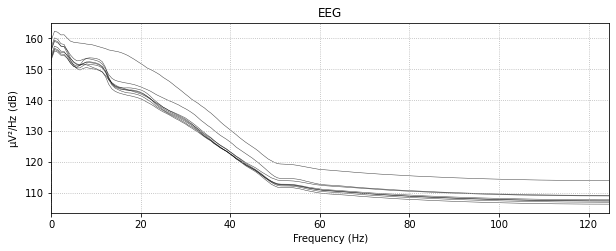

In [28]:
_=epo.plot_psd()

<ipython-input-39-38ef4ccab075>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict({'target':epo['target'].average(), 'no-target':epo['no-target'].average()}), picks=['C3'], cmap=('condition', 'viridis'))


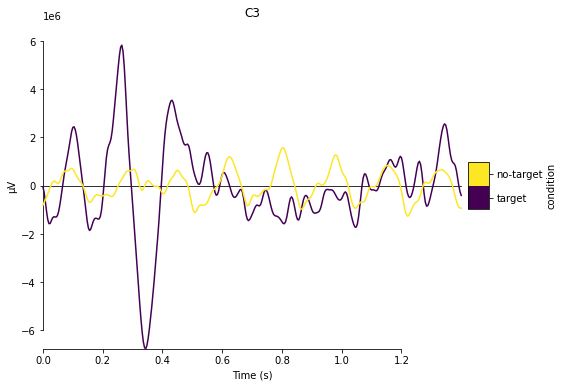

[<Figure size 576x432 with 2 Axes>]

In [39]:
mne.viz.plot_compare_evokeds(dict({'target':epo['target'].average(), 'no-target':epo['no-target'].average()}), picks=['C3'], cmap=('condition', 'viridis'))